In [121]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
print(tf.__version__)

2.1.0


# 1. Tensorflow를 사용해서 MNIST 정확도 90%이상 만들기

In [186]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [187]:
x_train = x_train.reshape(60000,28*28).astype('float32')/255
x_test = x_test.reshape(10000,28*28).astype('float32')/255

In [188]:
oht = OneHotEncoder()
y_train = oht.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oht.transform(y_test.reshape(-1,1)).toarray()

In [193]:
X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([28*28, 100]))
b1 = tf.Variable(tf.random_normal([100]))
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([100, 10]))
b2 = tf.Variable(tf.random_normal([10]))
hf = tf.nn.softmax(tf.matmul(layer1,W2)+b2)

In [197]:
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hf+1e-10), axis=1))
train = tf.train.GradientDescentOptimizer(1).minimize(cost)
isCorrect = tf.equal(tf.argmax(hf,axis=1), tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [202]:
numEpochs = 500
batchSize = 10000
numIter = x_train.shape[0]//batchSize

EPOCH:0001,cost:18.105706851
EPOCH:0011,cost:5.429873387
EPOCH:0021,cost:1.894032975
EPOCH:0031,cost:1.433618347
EPOCH:0041,cost:1.081321120
EPOCH:0051,cost:0.923168858
EPOCH:0061,cost:0.809055507
EPOCH:0071,cost:0.717178971
EPOCH:0081,cost:0.625347346
EPOCH:0091,cost:0.563974539
EPOCH:0101,cost:0.523257683
EPOCH:0111,cost:1.580332210
EPOCH:0121,cost:0.424944431
EPOCH:0131,cost:0.407506143
EPOCH:0141,cost:0.359238207
EPOCH:0151,cost:0.349108751
EPOCH:0161,cost:0.309445610
EPOCH:0171,cost:0.320558747
EPOCH:0181,cost:0.272110502
EPOCH:0191,cost:0.280978854
EPOCH:0201,cost:0.246078541
EPOCH:0211,cost:0.235374615
EPOCH:0221,cost:0.218066936
EPOCH:0231,cost:0.218170345
EPOCH:0241,cost:0.199423015
EPOCH:0251,cost:0.197743158
EPOCH:0261,cost:0.190889890
EPOCH:0271,cost:0.177996876
EPOCH:0281,cost:1.060624011
EPOCH:0291,cost:0.169523368
EPOCH:0301,cost:0.160616688
EPOCH:0311,cost:1.750068476
EPOCH:0321,cost:0.159730916
EPOCH:0331,cost:0.150720810
EPOCH:0341,cost:0.145652490
EPOCH:0351,cost:0.1

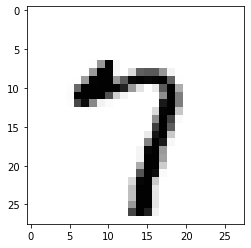

In [203]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpochs):
        avgCv = 0
        for i in range(numIter):
            batchX = x_train[batchSize*i:batchSize*(i+1)]
            batchY = y_train[batchSize*i:batchSize*(i+1)]
            _, hfv, cv = sess.run([train, hf, cost], feed_dict={X:batchX, Y:batchY})
            avgCv += cv/numIter
        if epoch%10 == 0:
            print("EPOCH:{:04d},cost:{:.9f}".format(epoch+1,avgCv))
    print('정확도:', sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))
    print("정확도:", accuracy.eval(session=sess, feed_dict={X:x_test, Y:y_test}))
    r=np.random.randint(0,len(y_test)-1)
    print("레이블:",sess.run(tf.argmax(y_test[r:r+1],1)))
    print("예측:", sess.run(tf.argmax(hf,1),feed_dict={X:x_test[r:r+1]}))
    
    plt.imshow(x_test[r:r+1].reshape(28,28), cmap='Greys')
    plt.show()
    sess.close()

정답률 95.09%

# 2. pima-indian 데이터

In [265]:
path = r"C:\Users\chan\Desktop\dataset"
file_ = "\\pima-indians-diabetes.csv"

In [266]:
df = pd.read_csv(path+file_)

In [267]:
xdata = df.iloc[:,:-1]
ydata = np.array(df.iloc[:,[-1]])

In [268]:
from sklearn.preprocessing import StandardScaler
xdata = StandardScaler().fit_transform(xdata)

In [269]:
print(xdata.shape, ydata.shape)

(767, 8) (767, 1)


In [356]:
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal(shape=[8,200]))
b1 = tf.Variable(tf.random_normal(shape=[200]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal(shape=[200,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))
hf = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [357]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=hf, labels=Y))
train = tf.train.GradientDescentOptimizer(1).minimize(loss)
pred = tf.cast(hf>=0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, Y), tf.float32))

In [358]:
epochs = 1000
batch_size = 100
iter_num = len(xdata)//batch_size
iter_num

7

In [359]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_lv = 0
        for i in range(iter_num):
            idx = np.random.choice(xdata.shape[0], batch_size)
            _, hv, lv = sess.run([train, hf, loss], 
                                 feed_dict={X:xdata[idx],
                                            Y:ydata[idx]})
            avg_lv += lv/iter_num
    
        if epoch % 100 == 0: 
            print(epoch, avg_lv)
    pred_, acc_, hf_ = sess.run([pred, accuracy, hf], feed_dict = {X:xdata, Y:ydata})
    print(acc_)

    sess.close()   

0 0.891800616468702
100 0.6469211918967112
200 0.6507208858217511
300 0.6411621485437665
400 0.6244073595319476
500 0.6375669666699002
600 0.6421453186443874
700 0.629095801285335
800 0.6330547077315194
900 0.6374745879854474
0.81877446


정확도 81.8%